## Problem Statement  


The Data Scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim of this data science project is to build a predictive model and find out the sales of each product at a particular store.  

- **Business Goal :** Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing sales.

We will handle this problem in a structured way following the table of content given below:
1) Problem Statement  
2) Hypothesis Generation  
3) Loading Packages and Data  
4) Data Structure and Content  
5) Exploratory Data Analysis  
6) Univariate Analysis  
7) Bivariate Analysis  
8) Missing Value Treatment  
9) Feature Engineering  
10) Encoding Categorical Variables  
11) Label Encoding  
12) One Hot Encoding  
13) PreProcessing Data  
14) Modeling  
15) Linear Regression  
16) Regularized Linear Regression  
17) RandomForest  
18) XGBoost  
19) Predictions & Summary  
20) Saving The Final Model

## Hypothesis Generation

hypothesis statements for  BigMart sales prediction :

**Product Visibility Affects Sales**: Products with higher visibility on store shelves may contribute to increased sales. There might be a positive correlation between item visibility and sales.


 **Store Location and Type Influence Sales**  : Stores located in urban areas (Tier 1 cities) may experience higher sales compared to stores in rural areas (Tier 3 cities). Additionally, supermarkets might have higher sales than regular grocery storese.

## Loading Packages and Data

In [2]:

import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, PolynomialFeatures, StandardScaler,RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import mean_absolute_error , mean_squared_error , r2_score
from xgboost import XGBRegressor

from sklearn import metrics

In [4]:
#Reading the files and saving it into train and test dataframes
train_data=pd.read_csv('Data/Train.csv')
test_data=pd.read_csv('Data/Test.csv')

## Data Structure and Content

In [198]:
train_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [165]:
test_data.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300000,reg,0.038428,Dairy,87.3198,OUT017,2007,Small,Tier 2,Supermarket Type1
2,NCN55,14.600000,Low Fat,0.099575,Others,241.7538,OUT010,1998,Small,Tier 3,Grocery Store
3,FDQ58,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Small,Tier 2,Supermarket Type1
4,FDY38,12.695633,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
5,FDH56,9.800000,Regular,0.063817,Fruits and Vegetables,117.1492,OUT046,1997,Small,Tier 1,Supermarket Type1
6,FDL48,19.350000,Regular,0.082602,Baking Goods,50.1034,OUT018,2009,Medium,Tier 3,Supermarket Type2
7,FDC48,12.695633,Low Fat,0.015782,Baking Goods,81.0592,OUT027,1985,Medium,Tier 3,Supermarket Type3
8,FDN33,6.305000,Regular,0.123365,Snack Foods,95.7436,OUT045,2002,Small,Tier 2,Supermarket Type1
9,FDA36,5.985000,Low Fat,0.005698,Baking Goods,186.8924,OUT017,2007,Small,Tier 2,Supermarket Type1


In [48]:
#Shape of the two dataframes 
print(train_data.shape)
print(test_data.shape)

(8523, 12)
(5681, 11)


In [7]:
print(train_data.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


* **Numerical features:**
  
<b>Item_Identifier</b> : Unique identifier for each product.

<b>Item_Weight</b> : The weight of the product.


<b>Item_Visibility</b> : The percentage of total display area of all products in a store allocated to the particular product.

<b>Outlet_Establishment_Year</b> : The year in which the store was established.

<b>Item_MRP</b> : Maximum Retail Price (MRP) of the product.

<b>Item_Outlet_Sales</b> : The sales of the product in the particular store.

* **Categorical features:**
  
<b>Outlet_Identifier</b> : Unique identifier for each store.

<b>Outlet_Size</b> : The size of the store (e.g., small, medium, or large).

<b>Item_Type</b> : The category to which the product belongs (e.g., dairy, meat, fruits, etc.).

<b>Item_Fat_Content</b> : Whether the product is low fat or regular.

<b>Outlet_Location_Type</b> : The type of city in which the store is located (e.g., Tier 1, Tier 2, or Tier 3).

<b>Outlet_Type</b> : The type of outlet (e.g., grocery store, supermarket, etc.).



In [49]:
train_data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [53]:
train_data.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDW13,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


In [9]:
train_data.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


* **2410 missing values in the Outlet_Size feature** which is a categorical feature.
* **1463 missing values in the Item_Weight feature** which is a Numerical feature.


In [54]:
test_data.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

* **1606 missing values in the Outlet_Size feature** which is a categorical feature.
* **976 missing values in the Item_Weight feature** which is a Numerical feature.

## Exploratory Data Analysis

### Univariate Analysis

In [7]:
numeric_cols = train_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols

['Item_Weight',
 'Item_Visibility',
 'Item_MRP',
 'Outlet_Establishment_Year',
 'Item_Outlet_Sales']

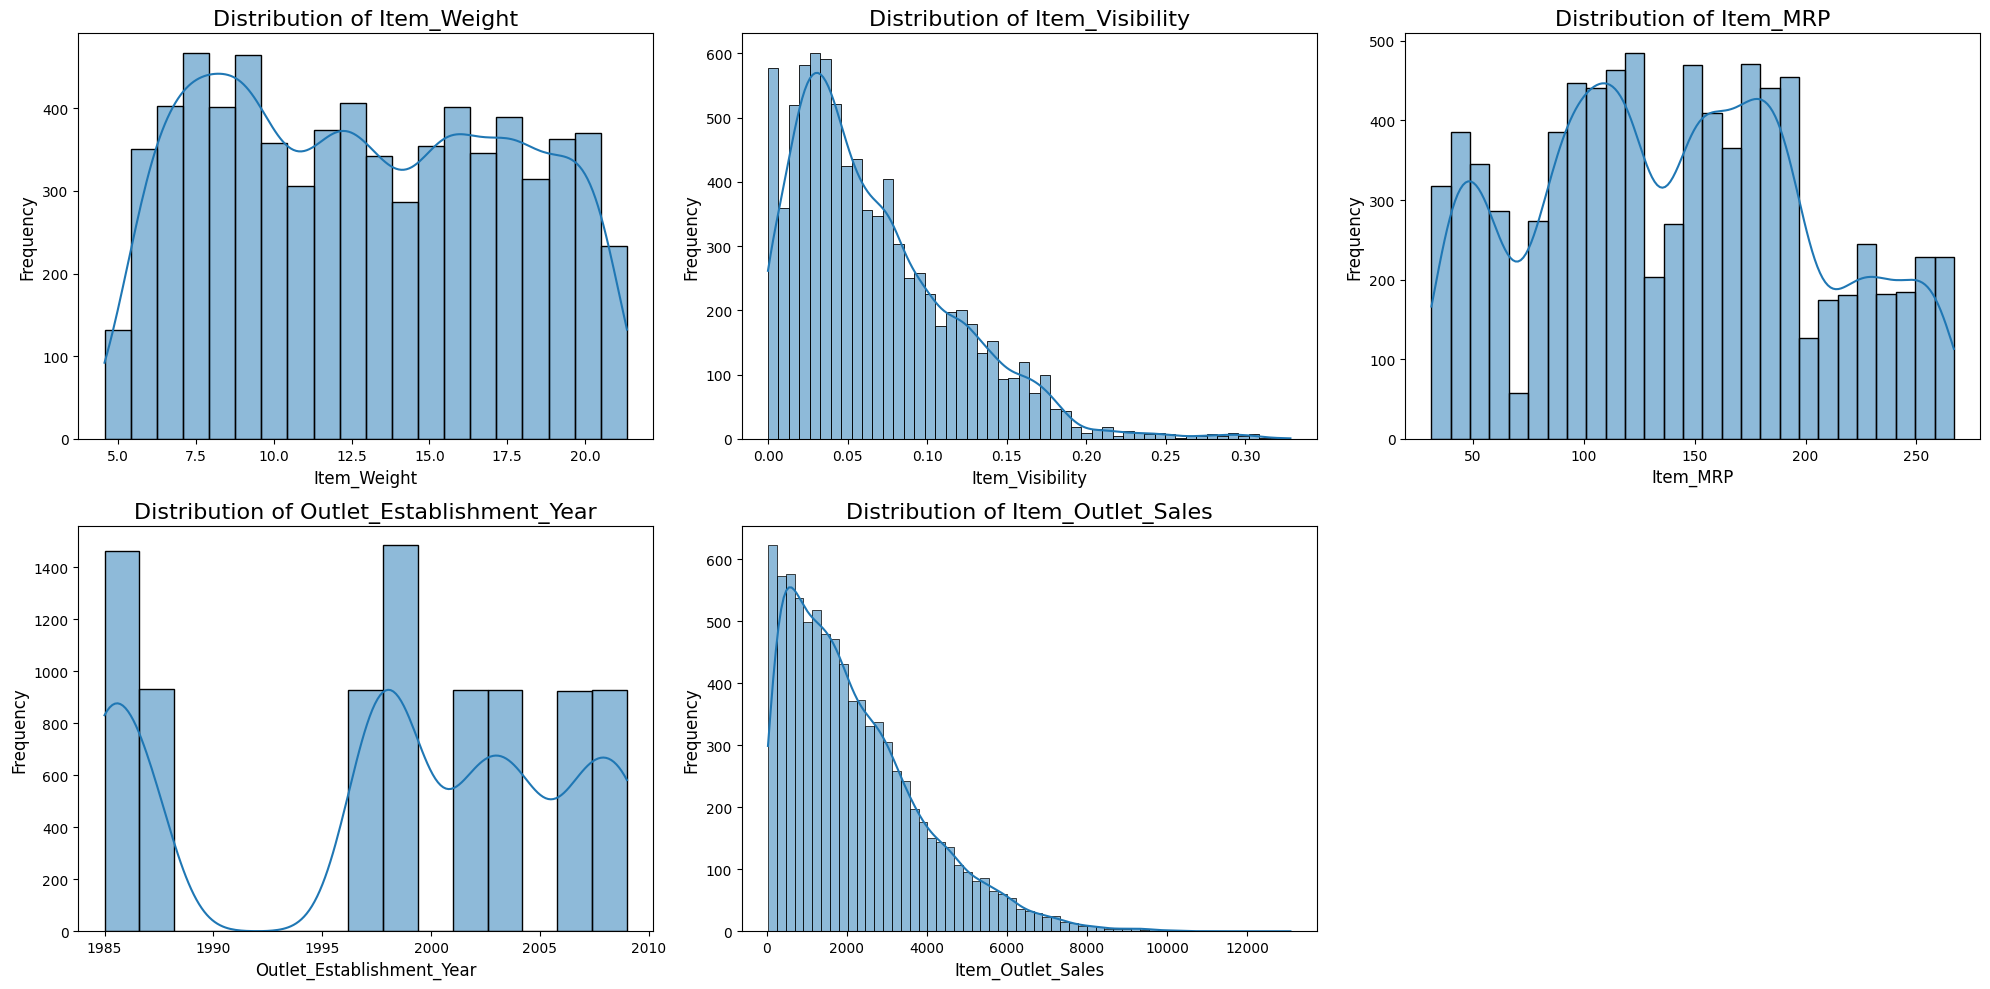

In [92]:
plt.figure(figsize=(20, 10))

for i, col in enumerate(numeric_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(train_data[col], kde=True)
    plt.title(f'Distribution of {col}', fontsize=16)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Insights, that we got from histogram,
* **Item_Weight:**  Most of  the item weights in the dataset are  between 5 Kg and 20 Kg.

* **Item_Visibility:**  Most of  the item Visibility in the dataset are between 0 and 0.20, feature is right skewed.

* **Outlet_Establishment_Year:** We can observe that a lots of stores have been established in the years 1985, 1998 etc... and there was no store establishment between 1990 and 1995.

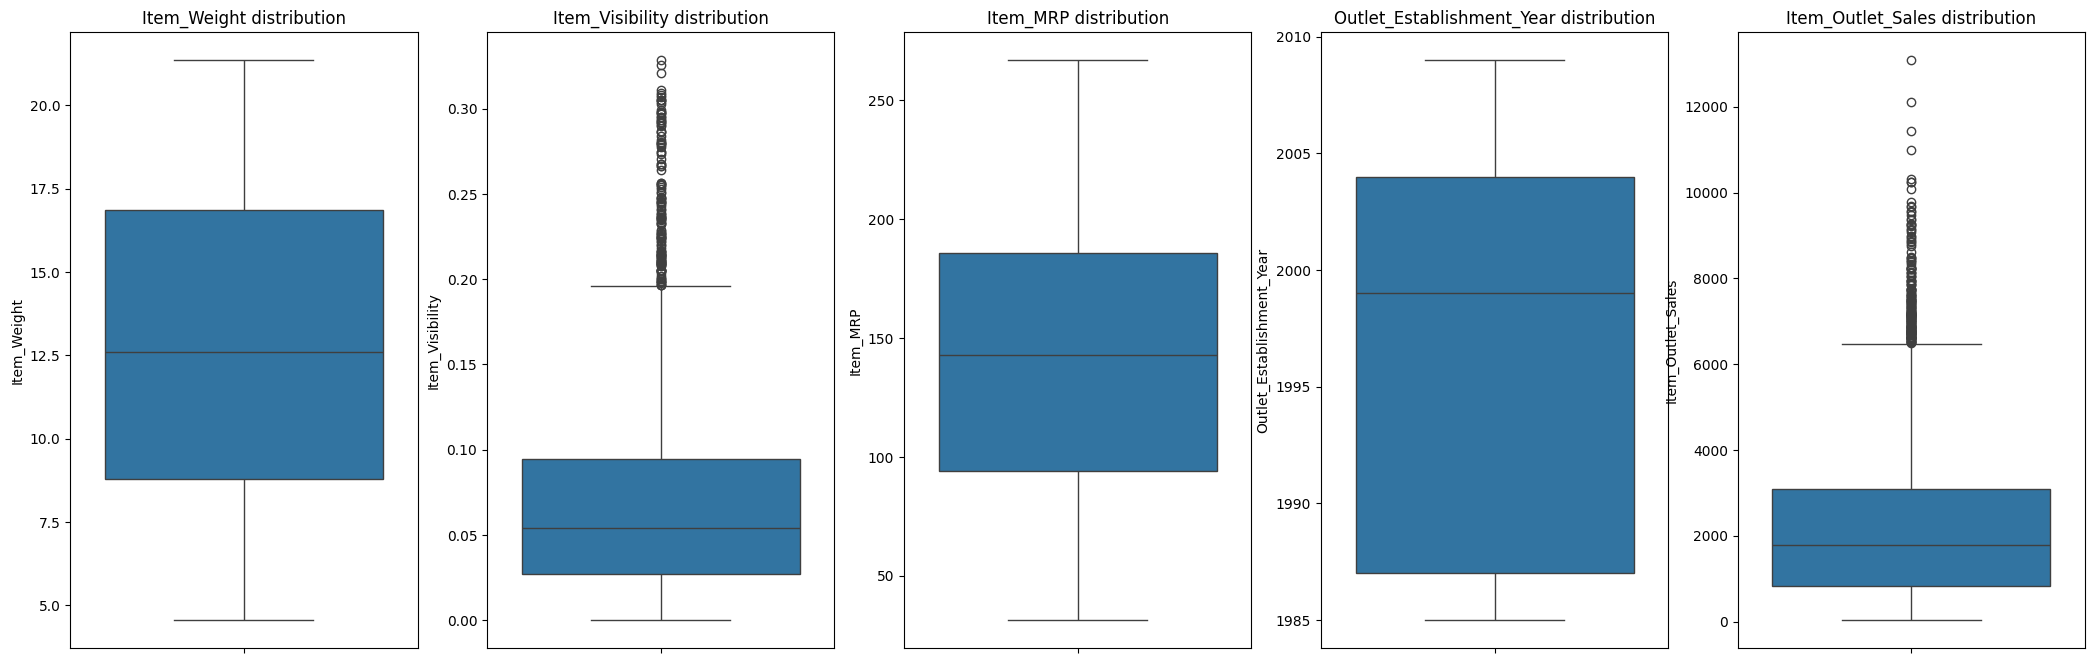

In [94]:
_, ax = plt.subplots(nrows=1, ncols=5, figsize=(26,8))
for index, col in enumerate(numeric_cols):
    sns.boxplot(data=train_data, y=col, ax=ax[index])
    ax[index].set_title(f'{col} distribution')

- Conversely there are some **outliers to be removed in the Item_Visibility and Item_Outlet_Sales features.**
- The train and the test data have almost the same distributions

In [100]:

for col in ['Item_Fat_Content', 'Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type' ]:
    print(f"Number of values in the {col} column is:\n{train_data[col].value_counts() }")
    print("--" * 30)

Number of values in the Item_Fat_Content column is:
Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Item_Type column is:
Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: count, dtype: int64
------------------------------------------------------------
Number of values in the Outlet_Size column is:
Outlet_Size
Medium    2793
Small     2388
High       932
Name: count, dtype: int64
------------

In [101]:
train_data['Item_Fat_Content'].replace({'LF':'Low Fat','low fat':'Low Fat','reg':'Regular'},inplace=True)

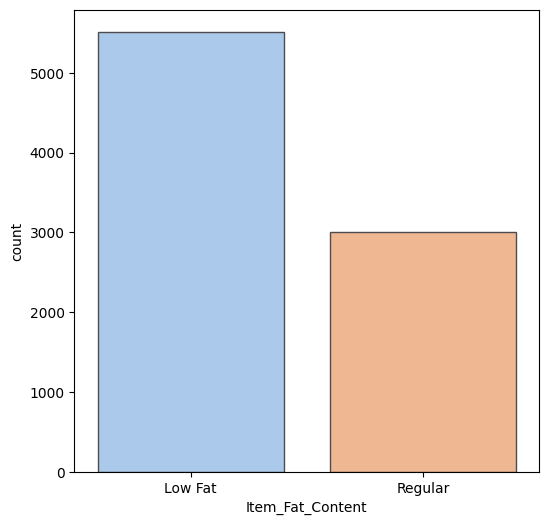

In [124]:
plt.figure(figsize=(6,6))
sns.countplot(x='Item_Fat_Content', data=train_data,palette='pastel', hue='Item_Fat_Content', edgecolor=".3")
plt.show()

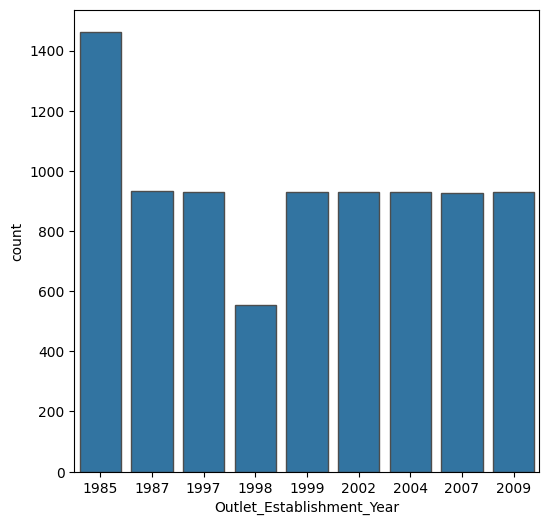

In [127]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Establishment_Year', data=train_data, edgecolor=".3")
plt.show()

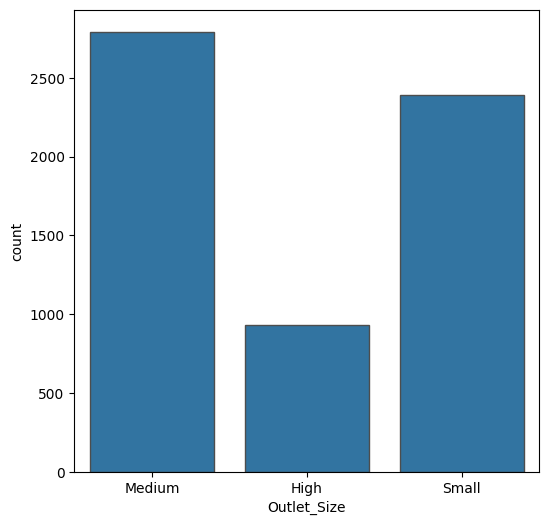

In [128]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Size', data=train_data, edgecolor=".3")
plt.show()

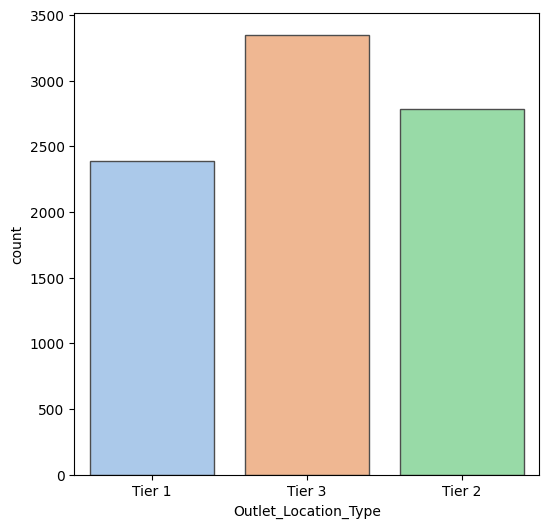

In [129]:
plt.figure(figsize=(6,6))
sns.countplot(x='Outlet_Location_Type', data=train_data,palette='pastel', hue='Outlet_Location_Type', edgecolor=".3")
plt.show()

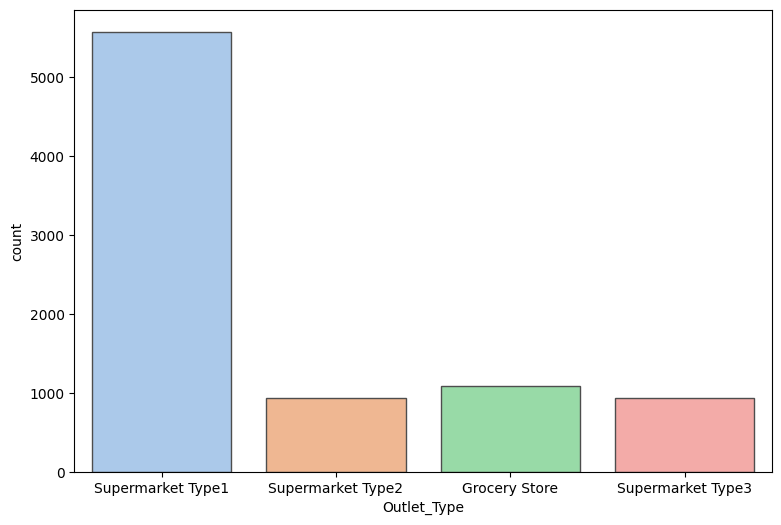

In [130]:
plt.figure(figsize=(9,6))
sns.countplot(x='Outlet_Type', data=train_data,  palette='pastel', hue='Outlet_Type', edgecolor=".3")
plt.show()

## Bivariate Analysis

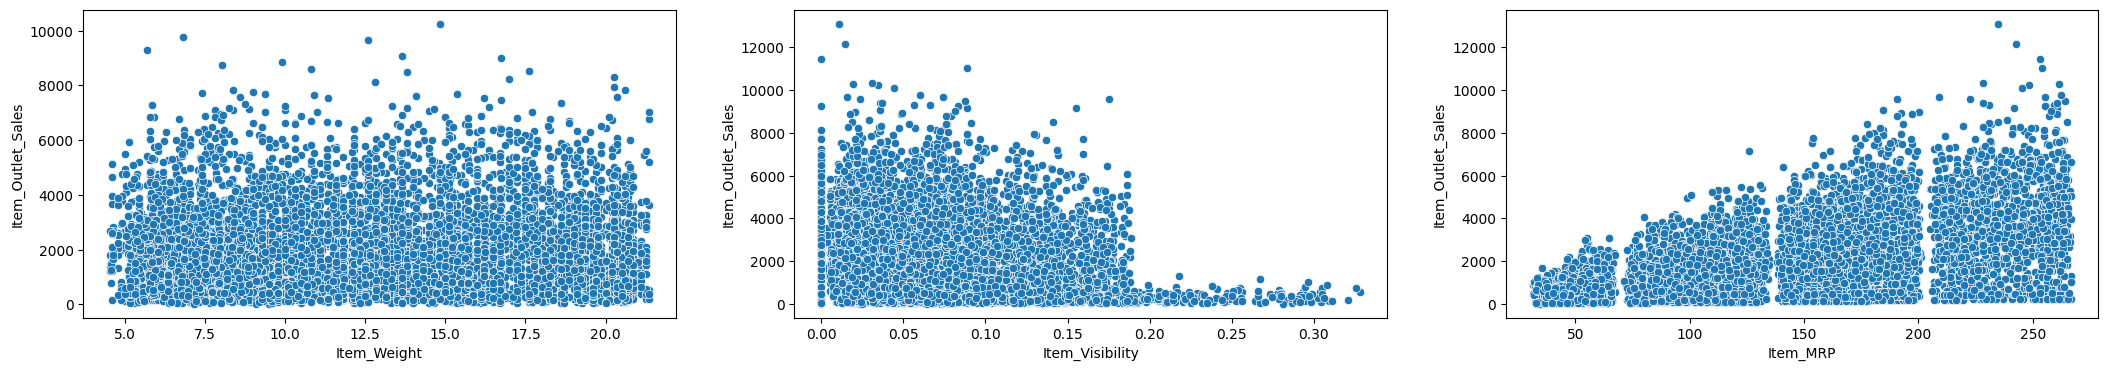

In [120]:
_, ax = plt.subplots(nrows=1, ncols=3, figsize=(26, 4))

for index, col in enumerate(['Item_Weight', 'Item_Visibility', 'Item_MRP']):
    sns.scatterplot(data=train_data,x=col, y="Item_Outlet_Sales", ax=ax[index])
    #ax[index].set_title(f'{col} distribution')

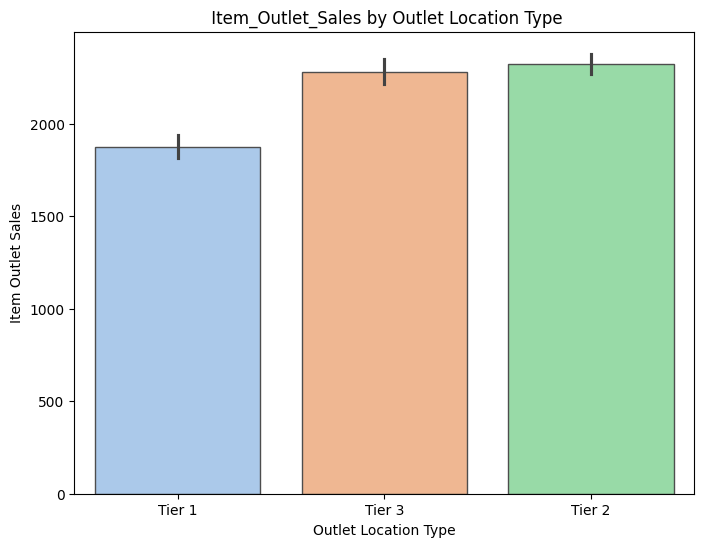

In [137]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=train_data, palette='pastel',hue='Outlet_Location_Type', edgecolor=".3")
plt.title(' Item_Outlet_Sales by Outlet Location Type')
plt.xlabel('Outlet Location Type')
plt.ylabel('Item Outlet Sales')
plt.show()

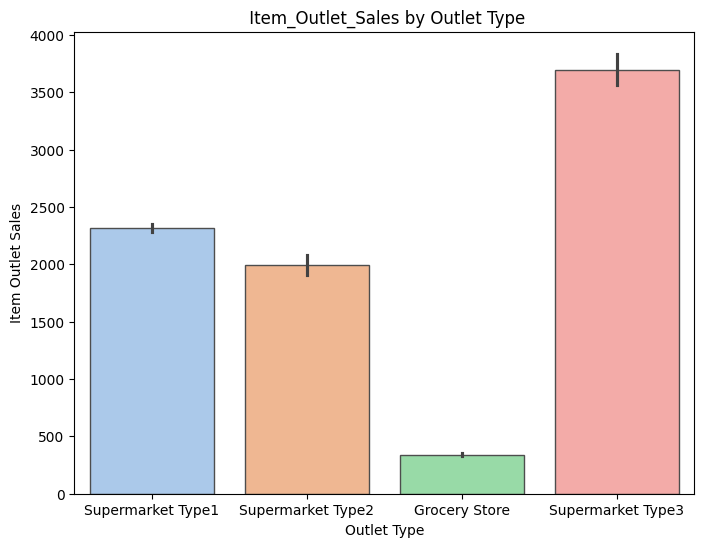

In [138]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Outlet_Type', y='Item_Outlet_Sales', data=train_data, palette='pastel',hue='Outlet_Type', edgecolor=".3")
plt.title(' Item_Outlet_Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Item Outlet Sales')
plt.show()

<Axes: >

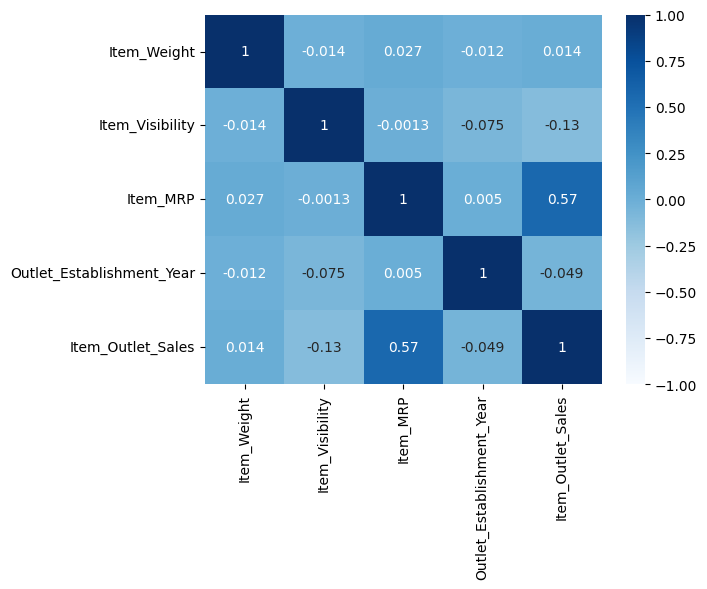

In [8]:
sns.heatmap(train_data[numeric_cols].corr(), annot=True,vmin=-1,vmax=1,cmap='Blues')

## Missing Value Treatment

In [231]:
train_data['Item_Weight'].fillna(train_data['Item_Weight'].mean(), inplace=True)
test_data['Item_Weight'].fillna(test_data['Item_Weight'].mean(), inplace=True)


In [232]:
mode_of_Outlet_size_train = train_data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0])
mode_of_Outlet_size_test = test_data.groupby('Outlet_Type')['Outlet_Size'].apply(lambda x: x.mode().iloc[0])

print(mode_of_Outlet_size_train,mode_of_Outlet_size_test)

Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object Outlet_Type
Grocery Store         Small
Supermarket Type1     Small
Supermarket Type2    Medium
Supermarket Type3    Medium
Name: Outlet_Size, dtype: object


In [233]:
train_data['Outlet_Size'] = train_data.apply(lambda row: mode_of_Outlet_size_train[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'], axis=1)

In [234]:
miss_values = train_data['Outlet_Size'].isnull().sum()
print(miss_values)

0


In [235]:
test_data['Outlet_Size'] = test_data.apply(lambda row: mode_of_Outlet_size_test[row['Outlet_Type']] if pd.isnull(row['Outlet_Size']) else row['Outlet_Size'], axis=1)

In [236]:
miss_values = test_data['Outlet_Size'].isnull().sum()
print(miss_values)

0


## Feature Engineering

Upper limit:  0.195979015
Lower limit:  -0.07440424500000001


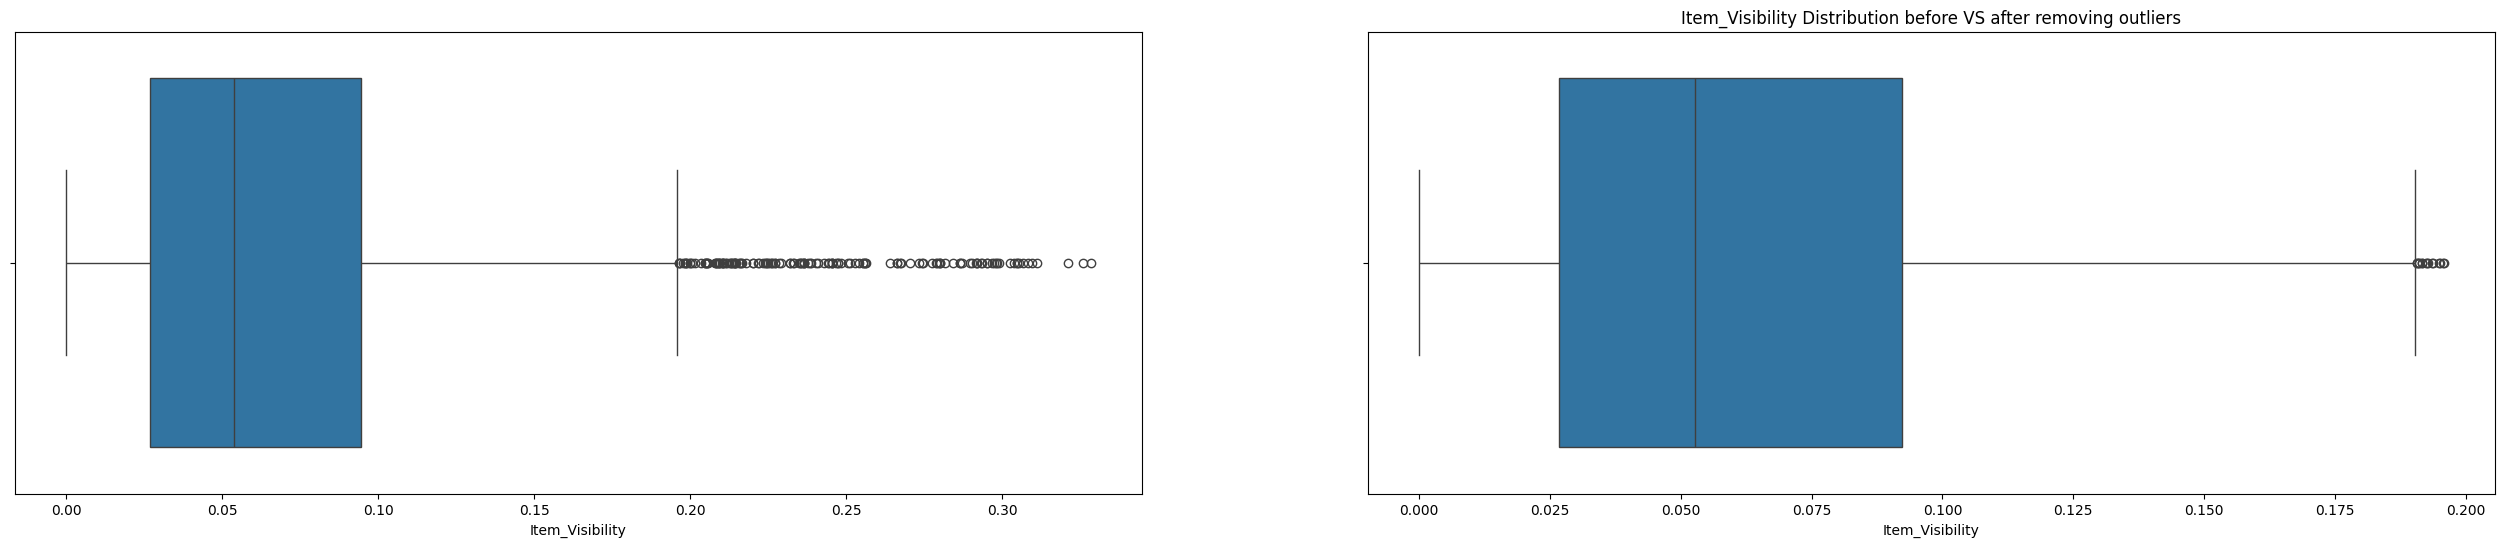

In [237]:
# function to detect outliers using the IQR method

def detect_outliers(df, feature):
    Q1  = df[feature].quantile(0.25)
    Q3  = df[feature].quantile(0.75)
    IQR = Q3 - Q1

    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = detect_outliers(train_data, "Item_Visibility")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train_data['Item_Visibility'], ax=ax[0])

# removing outliers using the above function
train_data = train_data[(train_data['Item_Visibility'] > lower) & (train_data['Item_Visibility'] < upper)] #train
test_data = test_data[(test_data['Item_Visibility'] > lower) & (test_data['Item_Visibility'] < upper)]     #test

sns.boxplot(x=train_data['Item_Visibility'], ax=ax[1])
plt.title('Item_Visibility Distribution before VS after removing outliers')
plt.show()

Upper limit:  6499.2067
Lower limit:  -2499.7460999999994


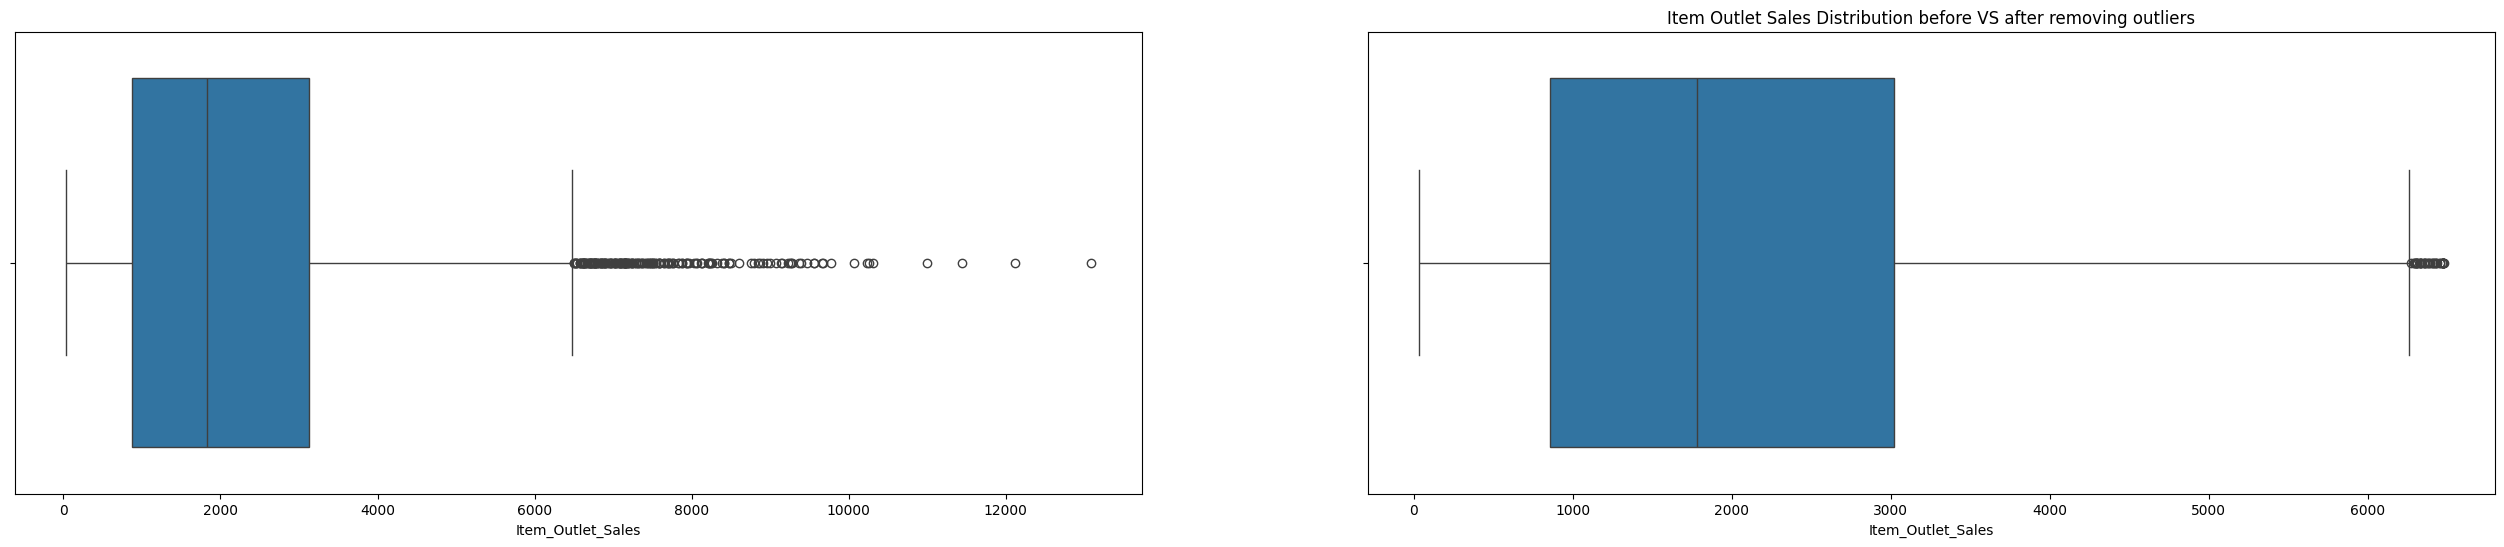

In [238]:
# detect outliers in the Item_Outlet_Sales feature
upper, lower = detect_outliers(train_data, "Item_Outlet_Sales")
print("Upper limit: ", upper)
print("Lower limit: ", lower)

_, ax = plt.subplots(nrows=1, ncols=2, figsize=(32, 6))
sns.boxplot(x=train_data['Item_Outlet_Sales'], ax=ax[0])

# removing outliers using the same function
train_data = train_data[(train_data['Item_Outlet_Sales'] > lower) & (train_data['Item_Outlet_Sales'] < upper)]

sns.boxplot(x=train_data['Item_Outlet_Sales'], ax=ax[1])
plt.title('Item Outlet Sales Distribution before VS after removing outliers')
plt.show()

## Encoding Categorical Variables

In [249]:
encoder = LabelEncoder()

In [250]:
train_data['Outlet_Size'] = encoder.fit_transform(train_data['Outlet_Size'])
test_data['Outlet_Size'] = encoder.fit_transform(test_data['Outlet_Size'])

In [251]:
train_data['Outlet_Location_Type'] = encoder.fit_transform(train_data['Outlet_Location_Type'])
test_data['Outlet_Location_Type'] = encoder.fit_transform(test_data['Outlet_Location_Type'])


In [252]:
ordinal_features = ['Item_Fat_Content', 'Outlet_Type']

for feature in ordinal_features:
    train_data[feature] = encoder.fit_transform(train_data[feature])
    test_data[feature]  = encoder.fit_transform(test_data[feature])


In [255]:
train_data['Outlet_Identifier'] = encoder.fit_transform(train_data['Outlet_Identifier'])
test_data['Outlet_Identifier'] = encoder.fit_transform(test_data['Outlet_Identifier'])
train_data['Item_Type'] = encoder.fit_transform(train_data['Item_Type'])
test_data['Item_Type'] = encoder.fit_transform(test_data['Item_Type'])

In [256]:
train_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,DRC01,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,FDN15,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,FDX07,19.200,2,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,NCD19,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8519,FDS36,8.380,2,0.046982,0,108.1570,7,2002,2,1,1,549.2850
8520,NCJ29,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8521,FDN46,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


## PreProcessing Data

In [274]:
y = train_data['Item_Outlet_Sales']
X = train_data.drop('Item_Outlet_Sales', axis=1)
X = X.iloc[:,1:]

In [275]:
X.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,9.30,1,0.016047,4,249.8092,9,1999,1,0,1
1,5.92,2,0.019278,14,48.2692,3,2009,1,2,2
2,17.50,1,0.016760,10,141.6180,9,1999,1,0,1
3,19.20,2,0.000000,6,182.0950,0,1998,2,2,0
4,8.93,1,0.000000,9,53.8614,1,1987,0,2,1


In [276]:
y.head()

0    3735.1380
1     443.4228
2    2097.2700
3     732.3800
4     994.7052
Name: Item_Outlet_Sales, dtype: float64

In [277]:
# splitting into training set and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

## Modeling

#### Linear Regression

In [295]:
steps = [
    ('scaler', StandardScaler()),
    ('poly',   PolynomialFeatures(degree=2)),
    ('model',  LinearRegression())
       ]

reg_prediction = Pipeline(steps)

reg_prediction.fit(X_train, y_train)

print(f'Training score = {reg_prediction.score(X_train, y_train)}')
print(f'Test score     = {reg_prediction.score(X_test, y_test)}')

Training score = 0.5768459825540553
Test score     = 0.5710970984733283


In [298]:
prediction = reg_prediction.predict(X_test)

In [299]:
# Evaluation
lin_reg_mse  = mean_squared_error(y_test , prediction)
lin_reg_rmse = math.sqrt(lin_reg_mse)
lin_reg_r2   = r2_score(y_test, prediction)

print(f'RMSE     = {lin_reg_rmse}')
print(f'R2 Score = {lin_reg_r2}')

RMSE     = 985.7272189928252
R2 Score = 0.5710970984733283


#### Regularized Linear Regression

In [300]:
steps = [
            ('scaler', StandardScaler()),
            ('poly'  , PolynomialFeatures(degree=2)),
            ('model' , Ridge(alpha=7, fit_intercept=True))
       ]

ridge_pipeline = Pipeline(steps)
ridge_pipeline.fit(X_train, y_train)

print(f'Training Score  = {ridge_pipeline.score(X_train, y_train)}')
print(f'Test Score      = {ridge_pipeline.score(X_test, y_test)}')

Training Score  = 0.5768429470708931
Test Score      = 0.5710465399432736


In [301]:
ridge_predictions = ridge_pipeline.predict(X_test)

In [302]:
# Evaluation
ridge_mse  = mean_squared_error(y_test , ridge_predictions)
ridge_rmse = math.sqrt(ridge_mse)
ridge_r2   = r2_score(y_test, ridge_predictions)

print(f'RMSE     = {ridge_rmse}')
print(f'R2 Score = {ridge_r2}')

Ridge RMSE     = 985.7853154179812
Ridge R2 Score = 0.5710465399432736


#### RandomForest

In [305]:
rand_forest_model = RandomForestRegressor()
rand_forest_model.fit(X_train, y_train)

RandomForestRegressor()

In [306]:
# Predictions for XGBoost on the test data
rand_forest_predictions = rand_forest_model.predict(X_test)

In [307]:
print('Training score  : {}'.format(rand_forest_model.score(X_train, y_train)))
print('Test score      : {}'.format(rand_forest_model.score(X_test, y_test)))

Training score  : 0.9329750420052272
Test score      : 0.5467932650477031


In [308]:
# Evaluation
rand_forest_mse = mean_squared_error(y_test , rand_forest_predictions)
rand_forest_rmse = math.sqrt(rand_forest_mse)
rand_forest_r2 = r2_score(y_test, rand_forest_predictions)

print(f'RMSE     = {rand_forest_rmse}')
print(f'R2 Score = {rand_forest_r2}')

RandomForest RMSE     = 1013.2705827059646
RandomForest R2 Score = 0.5467932650477031


#### XGBoost

In [309]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [310]:
xgb_predictions = xgb_model.predict(X_test)

In [311]:
print(f'Training score  = {xgb_model.score(X_train, y_train)}')
print(f'Test score      = {xgb_model.score(X_test, y_test)}')

XGBoost Training score  = 0.8534854279429304
XGBoost Test score      = 0.5137759166461702


In [312]:
xgb_mse = mean_squared_error(y_test , xgb_predictions)
xgb_rmse = math.sqrt(xgb_mse)
xgb_r2 = r2_score(y_test, xgb_predictions)

print(f'RMSE = {xgb_rmse}')
print(f'R2 Score = {xgb_r2}')

XGBoost RMSE = 1049.531529424507
XGBoost R2 Score = 0.5137759166461702


#### Lasso Regression

In [313]:
steps = [
            ('scaler', StandardScaler()),
            ('poly', PolynomialFeatures(degree=2)),
            ('model', Lasso(alpha=0.2, fit_intercept=True))
        ]

lasso_pipeline = Pipeline(steps)

lasso_pipeline.fit(X_train, y_train)

print(f'Training score  = {lasso_pipeline.score(X_train, y_train)}')
print(f'Test score      = {lasso_pipeline.score(X_test, y_test)}')

Training score  = 0.5768387960177594
Test score      = 0.5710993379053362


C:\Users\MO\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.169e+08, tolerance: 1.476e+06
  model = cd_fast.enet_coordinate_descent(


In [315]:
lasso_predictions = lasso_pipeline.predict(X_test)

In [316]:

lasso_mse  = mean_squared_error(y_test , lasso_predictions)
lasso_rmse = math.sqrt(lasso_mse)
lasso_r2   = r2_score(y_test, lasso_predictions)

print(f'Lasso RMSE      = {lasso_rmse}')
print(f'Lasso R2 Score  = {lasso_r2}')

Lasso RMSE      = 985.7246455992215
Lasso R2 Score  = 0.5710993379053362



### Final Predictions On The Test Dataset

In [317]:
test_data

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,FDW14,8.300000,4,0.038428,4,87.3198,2,2007,2,1,1
2,NCN55,14.600000,1,0.099575,11,241.7538,0,1998,2,2,0
3,FDQ58,7.315000,1,0.015388,13,155.0340,2,2007,2,1,1
4,FDY38,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,FDD47,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,NCO17,10.000000,1,0.073529,8,118.7440,7,2002,2,1,1
5679,FDJ26,15.300000,2,0.000000,3,214.6218,2,2007,2,1,1


In [318]:
# Final predictions on test data using Lasso
final_test_preds = reg_prediction.predict(test_data.iloc[:,1:])
final_test_preds

array([1779.6875, 1503.5   ,  843.5   , ..., 1894.9375, 3425.3125,
       1321.9375])

In [319]:
import pickle
with open("BigMart_Sales_Model.pkl", "wb") as file: 
    pickle.dump(lasso_pipeline, file)              